Instalacion de librerías

In [58]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

Se sube imagen a utilizar

In [60]:
def cargar_imagen_desde_github(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        image_array = np.frombuffer(response.content, np.uint8)
        imagen = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
        if imagen is None:
            raise ValueError("No se pudo decodificar la imagen")
        return imagen

    except Exception as e:
        print(f"Error al cargar la imagen: {e}")
        return None

In [61]:
url = 'https://raw.githubusercontent.com/JuanCruzMonteros/Vision-Computacional/main/Tp3%20-%20Detecci%C3%B3n%20de%20bordes%20OpenCV/paisaje.jpg'
imagen = cargar_imagen_desde_github(url)

Transformo imagen a escala de grises

In [62]:
def transformar_imagen_escala_de_grises(imagen):
    if imagen is not None:
        imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
        return imagen_gris  # Retornar para usar después
    else:
        print("No se pudo cargar la imagen. Verifica la URL.")
        return None

imagen_gris = transformar_imagen_escala_de_grises(imagen)

array([[126, 126, 127, ..., 202, 202, 202],
       [127, 127, 128, ..., 203, 203, 203],
       [129, 129, 129, ..., 203, 203, 203],
       ...,
       [ 99, 113,  75, ...,  95,  93,  98],
       [ 91, 104,  46, ...,  99,  97,  78],
       [ 78, 106,  44, ...,  98,  82,  83]], dtype=uint8)
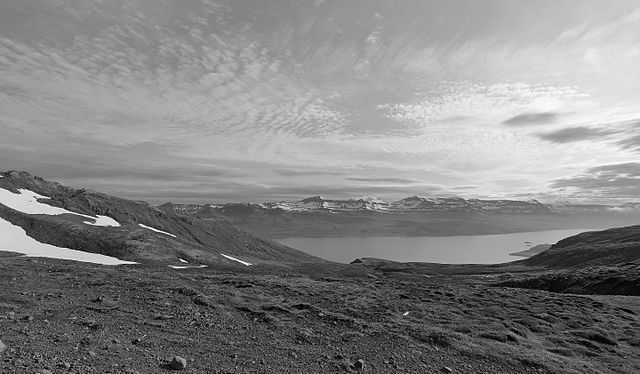

In [63]:
imagen_gris

Defino metodo para aplicar detección de bordes

In [65]:
def aplicar_sobel(imagen_gris, direccion='ambas'):
    """
    Aplica detector Sobel

    Parámetros:
    - imagen_gris: imagen en escala de grises
    - direccion: 'x', 'y', o 'ambas'
    """
    if direccion == 'x':
        sobelx = cv2.Sobel(imagen_gris, cv2.CV_64F, 1, 0, ksize=3)
        bordes = np.absolute(sobelx)
    elif direccion == 'y':
        sobely = cv2.Sobel(imagen_gris, cv2.CV_64F, 0, 1, ksize=3)
        bordes = np.absolute(sobely)
    else:
        sobelx = cv2.Sobel(imagen_gris, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(imagen_gris, cv2.CV_64F, 0, 1, ksize=3)
        bordes = np.sqrt(sobelx**2 + sobely**2)

    bordes = np.uint8(np.clip(bordes, 0, 255))
    return bordes

array([[  0,   0,   0, ...,   0,   0,   0],
       [ 12,  11,   7, ...,   5,   4,   4],
       [ 12,  10,   6, ...,   1,   0,   0],
       ...,
       [ 74,  11, 177, ...,  48,  61,  24],
       [ 56,  66, 166, ...,   5,  34,  52],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
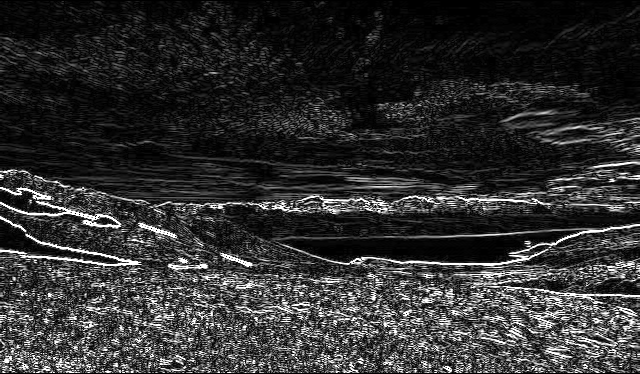

In [66]:
aplicar_sobel(imagen_gris, 'y')